In [10]:
import pandas as pd
import numpy as np

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.graphics.tsaplots as tsg
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose 

from datetime import datetime, date

In [2]:
df_raw = pd.read_csv('./data/00_original/Lake_Bilancino.csv', sep=',', header=0, index_col=0)

df = df_raw[['Lake_Level']].copy()
df.index = pd.to_datetime(df.index, format = '%d/%m/%Y')
df = df.asfreq('d')
df.head(5)

,Lake_Level
Date,
2002-06-03,249.43
2002-06-04,249.43
2002-06-05,249.43
2002-06-06,249.43
2002-06-07,249.44


In [3]:
df['Lake_Level'] -= (251 - 31)
print(df.isna().sum())

Lake_Level    0
dtype: int64


<AxesSubplot:xlabel='Date'>

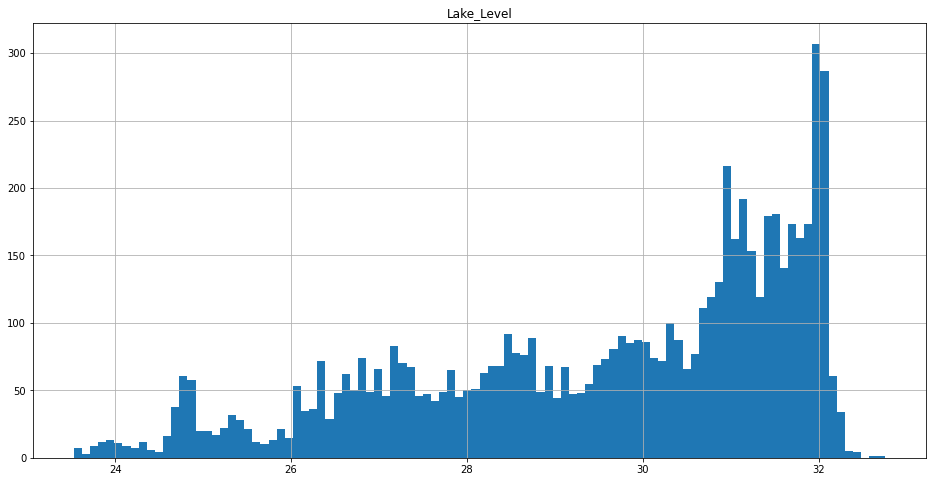

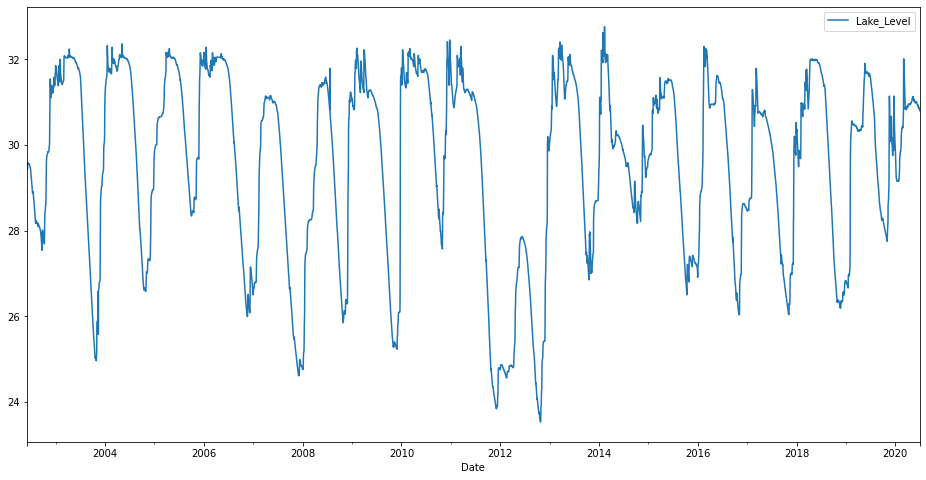

In [4]:
df.hist(figsize=(16, 8), bins=100)
df.plot(figsize=(16, 8))

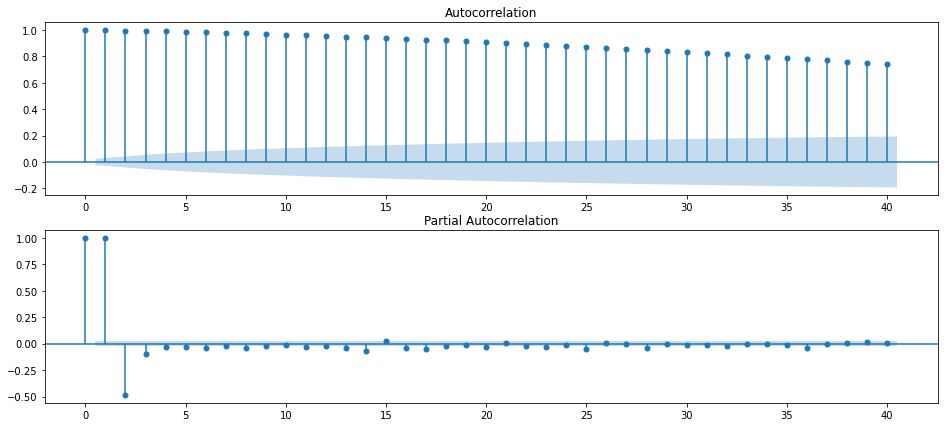

In [5]:
# SEASONALITY CHECK

fig, ax = plt.subplots(2, 1, figsize=(16, 7))

tsg.plot_acf(df['Lake_Level'],lags=40, ax=ax[0])
tsg.plot_pacf(df['Lake_Level'],lags=40, ax=ax[1])
plt.show()

In [11]:
result = tsa.seasonal_decompose(df['Lake_Level'], model='additive', period=5)

fig, ax = plt.subplots(4,1, figsize=(16, 10))

result.observed.plot(ax=ax[0])
ax[0].set_ylabel('Observed')
result.trend.plot(ax=ax[1])
ax[1].set_ylabel('Trend')
result.seasonal.plot(ax=ax[2]) # blue square = no cyclical pattern because value is constantly jumping up and down
ax[2].set_ylabel('Seasonal')
result.resid.plot(ax=ax[3])
ax[3].set_ylabel('Residual')

NameError: name 'tsa' is not defined

In [ ]:
# STATIONARITY
# Stationarity check means that we have constant mean and variance of the data over the time.
# We can inspect visually or use Dickey-Fuller statistical test.

# TODO HERE PLOT LAKE_LEVEL WITH ROLLING AVG AND STD

# Dickey-Fuller statisticall test:
# Is trying to reject the null hypothesis that the data is non-stationary.
# If we reject the test means that data is stationary
#    if p <= 0.05 we reject the null hypothesis and data is stationary
#    if p >  0.05 we accept the null hypothesis and data is non-stationary

adf_test = sts.adfuller(df['Lake_Level']) # Lake_Level is non-stationary

print('Lake_Level ADF = {}'.format(str(adf_test[0])))
print('Lake_Level p-value = {}'.format(str(adf_test[1])))
print('           is not stationary variable!')

fig, ax = plt.subplots(1, 1, figsize=(16, 7))

ax.scatter(x=df.index, y=df['Lake_Level'], label='Lake_Level', marker='.', s=10, alpha=1)
ax2 = ax.twinx()
months = 16 * 12
ax.plot(df['Lake_Level'].rolling(months).mean(), color='red', label='rolling mean')
ax.plot(df['Lake_Level'].rolling(months).std(), color='purple', label='rolling std')
fl = fig.legend(loc='upper center')

# TODO CHECK EVERY VARIABLE